# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Numerical Exercise 12 </span>


### Exercise 12.1

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
an example of a data point with label 4


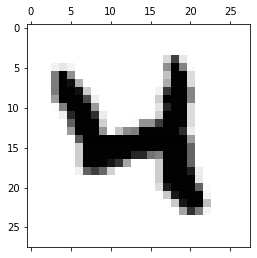

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.
313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9749

Test loss: 0.07671713083982468
Test accuracy: 0.9749000072479248


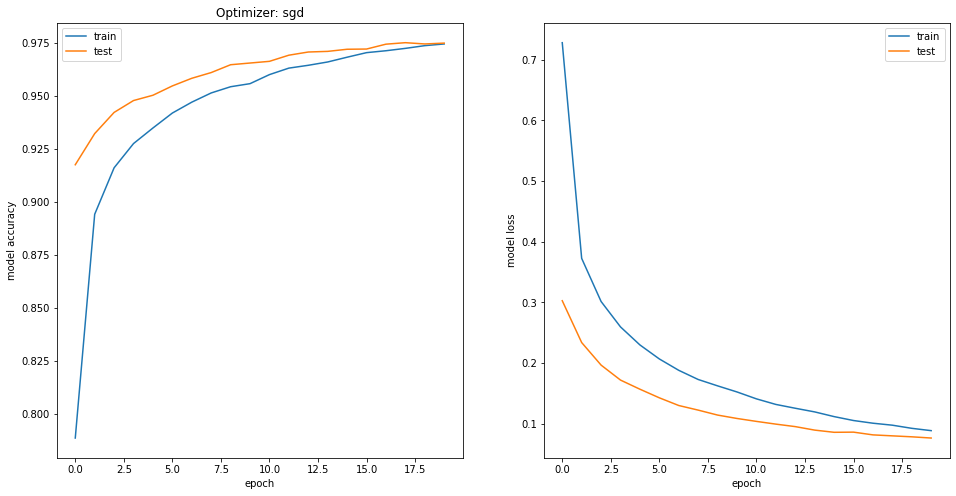

313/313 [==============================] - 1s 2ms/step - loss: 0.4086 - accuracy: 0.9707

Test loss: 0.40856125950813293
Test accuracy: 0.9707000255584717


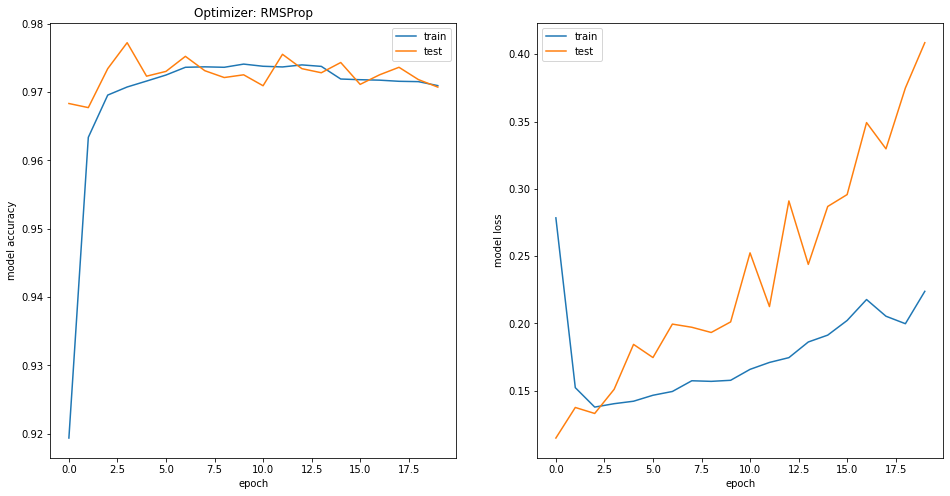

313/313 [==============================] - 1s 2ms/step - loss: 0.1341 - accuracy: 0.9830

Test loss: 0.13407623767852783
Test accuracy: 0.9829999804496765


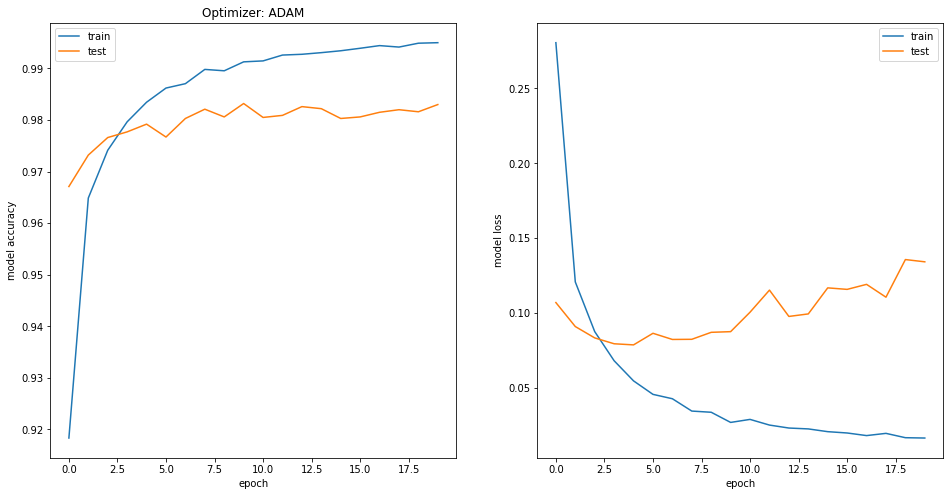

313/313 [==============================] - 1s 2ms/step - loss: 0.1568 - accuracy: 0.9534

Test loss: 0.15681974589824677
Test accuracy: 0.9534000158309937


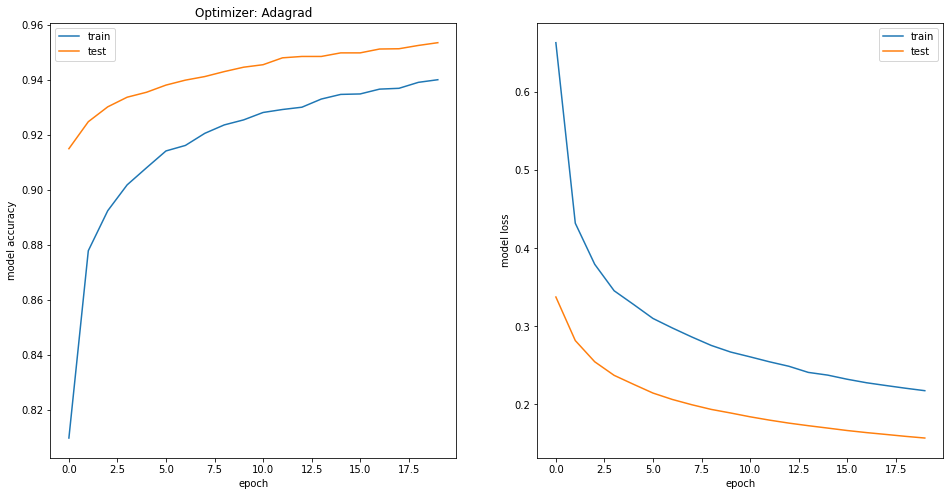

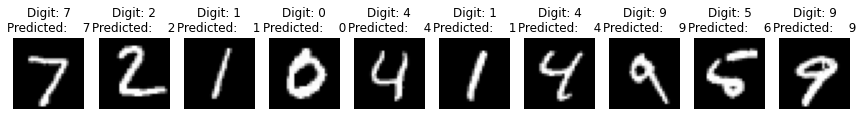

In [4]:
import tensorflow as tf
#from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
tf.keras.utils.to_categorical(labels)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(optim):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=optim,
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

# training parameters
batch_size = 32
epochs = 20

for optim in ['sgd','RMSProp','ADAM','Adagrad']:
    # create the deep neural net
    model_DNN = compile_model(optim)

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))

    # evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose=1)

    # print performance
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # look into training history
    plt.figure(figsize=(16,8))

    # summarize history for accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Optimizer: '+optim)
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

    # summarize history for loss
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

When the NN is trained by means of the RMSProp or ADAM optimizers, the loss exhibit a divergent behaviour which is usually a sign of overfitting. Anyway divergence occurs on different scales; thus the accuracy in the RMSProp case  lowers upon increasing the epoch while accuracy is stationary in the ADAM case.

Instead using either AdaGrad or SGD optimizers the error (defined as $E_{out}-E_{in}$, i.e. $E_{test}-E_{train}$ ) decreases upon increasing the epoch as expected in NN training. Among these two, SGD show better performance in decreasing both error and out of sample error within the considered epoch value, while AdaGrad shows the worst accuracy among the four optimizers.

### Exercise 12.2

My CNN has 2 pair of Conv2D+MaxPooling layers, in order to downsize every image to 10x10 pixel, and then a 20 neuron Dense fully connected layer after a Flattening layer. The output layer has 10 neurons and a softmax activation in order to output matching probability for each digit. As explained in full detail in Exercise 12.3 a simpler CNN has similar perfomance but worse generalization.

In [5]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if tf.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print()
print(np.array(input_shape))

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples

[28 28  1]


In [6]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid") )
    
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid") )
    
    model.add(Flatten())
    model.add(Dense(20,activation='relu'))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    
    
    
    model.add(Dense(10, activation='softmax'))
    # compile the model
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [7]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

model_CNN.summary()
# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 10)          2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 20)                3220      
_________________________________________________________________
dense_22 (Dense)             (None, 10)               

313/313 [==============================] - 2s 5ms/step - loss: 0.0745 - accuracy: 0.9778: 0s - loss: 0.0776 - ac

Test loss: 0.07446053624153137
Test accuracy: 0.9778000116348267


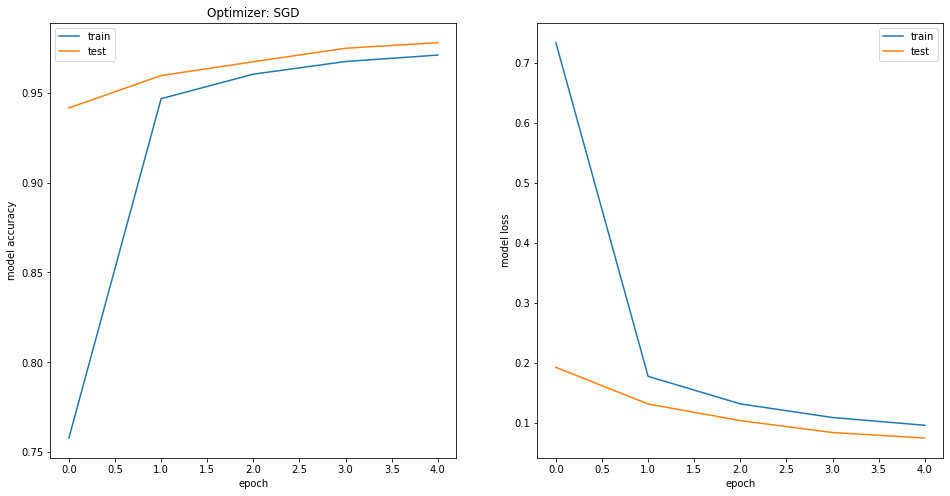

In [8]:
#CNN Evaluation
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
plt.figure(figsize=(16,8))

# summarize history for accuracy
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Optimizer: SGD')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

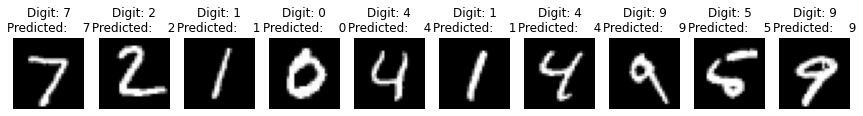

In [9]:
#CNN Prediction
predictions = model_CNN.predict(X_test)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Exercise 12.3

For exercise 12.3 I generated my own handwrittend digits with GIMP. I noticed a simpler CNN failed with only one convolutional+max_pooling failed on half of my handwritten digits while failing only for the digit 5 of the test sample from MNIST. A more complex CNN with two convolutional+max_pooling missed the digits 7 and 9 (admittedly, worst digit i wrote) and the 4.

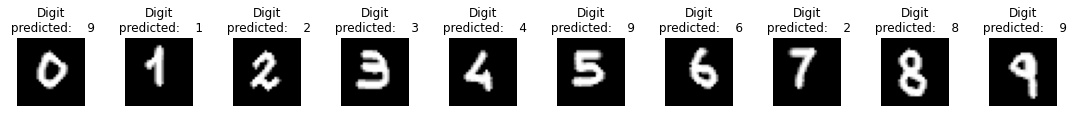

In [10]:
from PIL import Image
import os

#print(os.getcwd())
plt.figure(figsize=(15, 15)) 


for k in range(10):
    digit_filename = "./digits_b/"+str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    #plt.figure(figsize=(5,5))
    #plt.imshow(data, cmap='gray')
    #plt.show()

    #print(data.shape)

    #data = data.reshape(1,xdim*ydim)
    #print(data.shape)

    if tf.keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(1, 1, img_rows, img_cols)
        data = data.reshape(1, 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(1, img_rows, img_cols, 1)
        data = data.reshape(1, img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)


    pred_0 = model_CNN.predict(data)

    data = data.reshape(xdim,ydim)

    ax = plt.subplot(2, 10, k + 1)    
    plt.imshow(data, cmap='gray')    
    plt.title("Digit\n predicted:    {}".format(np.argmax(pred_0)))
    plt.tight_layout()
    plt.axis('off') 
plt.show()

I also tried to check translational invariance of the CNN. Prediction ability of the previous CNN was very poor. I tried to improve my CNN adding a third Conv2D+MaxPooling layer and downsizing the filter hoping to have better local performances. This new CNN made at least a correct guess in the translated digit. I think the prediction abilities of the CNN can be improved either by adding another Conv2D+MaxPooling layer either training the CNN for higher epochs.

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 10)        910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 10)          910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)               

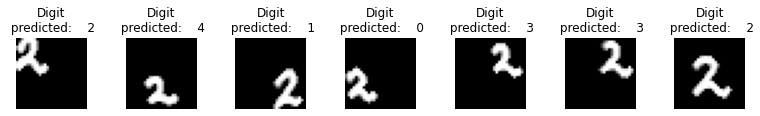

In [12]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid") )
    
    model.add(Conv2D(10, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid") )
    
    model.add(Conv2D(10, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid") )
    
    
    model.add(Flatten())
    model.add(Dense(30,activation='relu'))    
    model.add(Dense(10, activation='softmax'))
    # compile the model
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model


# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

model_CNN.summary()
# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(15, 15)) 

n=0
for k in ['a','b','c','d','e','f','g']:
    n=n+1
    digit_filename = "./dos/"+"2"+k+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    #plt.figure(figsize=(5,5))
    #plt.imshow(data, cmap='gray')
    #plt.show()

    #print(data.shape)

    #data = data.reshape(1,xdim*ydim)
    #print(data.shape)

    if tf.keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(1, 1, img_rows, img_cols)
        data = data.reshape(1, 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(1, img_rows, img_cols, 1)
        data = data.reshape(1, img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)


    pred_0 = model_CNN.predict(data)

    data = data.reshape(xdim,ydim)

    ax = plt.subplot(2, 10, n + 1)    
    plt.imshow(data, cmap='gray')    
    plt.title("Digit\n predicted:    {}".format(np.argmax(pred_0)))
    plt.tight_layout()
    plt.axis('off') 
plt.show()